In [1]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd 
import numpy as np
from ctgan import CTGANSynthesizer

In [2]:
df = pd.read_csv('../datasets/diabetes_dropped_imputed_encoded.csv')

In [3]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (14, 8)
matplotlib.rcParams['figure.facecolor'] = '#000000'

In [4]:
df.head()

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,...,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn,height_meters,BMI,hip_waist_ratio,diabetic
0,0,203.0,27,56.0,3.6,4.31,0,27,0,62.0,...,59.0,152.382979,92.524823,29.0,38.0,720.0,1.5748,48.790420,0.763158,0
1,1,165.0,42,24.0,6.9,4.44,0,10,0,64.0,...,68.0,152.382979,92.524823,46.0,48.0,360.0,1.6256,82.495282,0.958333,0
2,2,228.0,37,37.0,6.2,4.64,0,39,0,61.0,...,92.0,185.000000,92.000000,49.0,57.0,180.0,1.5494,106.638214,0.859649,0
3,3,78.0,38,12.0,6.5,4.63,0,48,1,67.0,...,50.0,152.382979,92.524823,33.0,38.0,480.0,1.7018,41.089412,0.868421,0
4,4,249.0,35,28.0,8.9,7.72,0,45,1,68.0,...,80.0,152.382979,92.524823,44.0,41.0,300.0,1.7272,61.343116,1.073171,1


In [5]:
df_1 = df.drop(columns=['id'])

In [6]:
df_1.head()

,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,...,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn,height_meters,BMI,hip_waist_ratio,diabetic
0,203.0,27,56.0,3.6,4.31,0,27,0,62.0,121.0,...,59.0,152.382979,92.524823,29.0,38.0,720.0,1.5748,48.790420,0.763158,0
1,165.0,42,24.0,6.9,4.44,0,10,0,64.0,218.0,...,68.0,152.382979,92.524823,46.0,48.0,360.0,1.6256,82.495282,0.958333,0
2,228.0,37,37.0,6.2,4.64,0,39,0,61.0,256.0,...,92.0,185.000000,92.000000,49.0,57.0,180.0,1.5494,106.638214,0.859649,0
3,78.0,38,12.0,6.5,4.63,0,48,1,67.0,119.0,...,50.0,152.382979,92.524823,33.0,38.0,480.0,1.7018,41.089412,0.868421,0
4,249.0,35,28.0,8.9,7.72,0,45,1,68.0,183.0,...,80.0,152.382979,92.524823,44.0,41.0,300.0,1.7272,61.343116,1.073171,1


In [7]:
df_1['bool_col'] = np.where(df_1['diabetic'] ==1, 'True', 'False')

In [8]:
df_1

,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,...,bp.2s,bp.2d,waist,hip,time.ppn,height_meters,BMI,hip_waist_ratio,diabetic,bool_col
0,203.0,27,56.0,3.6,4.310000,0,27,0,62.0,121.0,...,152.382979,92.524823,29.0,38.0,720.0,1.5748,48.790420,0.763158,0,False
1,165.0,42,24.0,6.9,4.440000,0,10,0,64.0,218.0,...,152.382979,92.524823,46.0,48.0,360.0,1.6256,82.495282,0.958333,0,False
2,228.0,37,37.0,6.2,4.640000,0,39,0,61.0,256.0,...,185.000000,92.000000,49.0,57.0,180.0,1.5494,106.638214,0.859649,0,False
3,78.0,38,12.0,6.5,4.630000,0,48,1,67.0,119.0,...,152.382979,92.524823,33.0,38.0,480.0,1.7018,41.089412,0.868421,0,False
4,249.0,35,28.0,8.9,7.720000,0,45,1,68.0,183.0,...,152.382979,92.524823,44.0,41.0,300.0,1.7272,61.343116,1.073171,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,296.0,113,46.0,6.4,16.110001,1,34,1,69.0,173.0,...,130.000000,94.000000,35.0,39.0,210.0,1.7526,56.322314,0.897436,1,True
399,284.0,34,54.0,5.3,4.390000,1,32,0,63.0,154.0,...,146.000000,102.000000,32.0,43.0,180.0,1.6002,60.141214,0.744186,0,False
400,194.0,105,38.0,5.1,13.630000,1,10,0,69.0,167.0,...,152.382979,92.524823,33.0,40.0,20.0,1.7526,54.368939,0.825000,1,True
401,199.0,21,52.0,3.8,4.490000,1,22,0,63.0,197.0,...,152.382979,92.524823,41.0,48.0,255.0,1.6002,76.933890,0.854167,0,False


In [9]:
df_1.columns

Index(['chol', 'stab.glu', 'hdl', 'ratio', 'glyhb', 'location', 'age',
       'gender', 'height', 'weight', 'frame', 'bp.1s', 'bp.1d', 'bp.2s',
       'bp.2d', 'waist', 'hip', 'time.ppn', 'height_meters', 'BMI',
       'hip_waist_ratio', 'diabetic', 'bool_col'],
      dtype='object')

In [10]:
df_2 = df_1.drop(columns=['diabetic'])

In [11]:
df_2

,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,...,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn,height_meters,BMI,hip_waist_ratio,bool_col
0,203.0,27,56.0,3.6,4.310000,0,27,0,62.0,121.0,...,59.0,152.382979,92.524823,29.0,38.0,720.0,1.5748,48.790420,0.763158,False
1,165.0,42,24.0,6.9,4.440000,0,10,0,64.0,218.0,...,68.0,152.382979,92.524823,46.0,48.0,360.0,1.6256,82.495282,0.958333,False
2,228.0,37,37.0,6.2,4.640000,0,39,0,61.0,256.0,...,92.0,185.000000,92.000000,49.0,57.0,180.0,1.5494,106.638214,0.859649,False
3,78.0,38,12.0,6.5,4.630000,0,48,1,67.0,119.0,...,50.0,152.382979,92.524823,33.0,38.0,480.0,1.7018,41.089412,0.868421,False
4,249.0,35,28.0,8.9,7.720000,0,45,1,68.0,183.0,...,80.0,152.382979,92.524823,44.0,41.0,300.0,1.7272,61.343116,1.073171,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,296.0,113,46.0,6.4,16.110001,1,34,1,69.0,173.0,...,94.0,130.000000,94.000000,35.0,39.0,210.0,1.7526,56.322314,0.897436,True
399,284.0,34,54.0,5.3,4.390000,1,32,0,63.0,154.0,...,100.0,146.000000,102.000000,32.0,43.0,180.0,1.6002,60.141214,0.744186,False
400,194.0,105,38.0,5.1,13.630000,1,10,0,69.0,167.0,...,70.0,152.382979,92.524823,33.0,40.0,20.0,1.7526,54.368939,0.825000,True
401,199.0,21,52.0,3.8,4.490000,1,22,0,63.0,197.0,...,78.0,152.382979,92.524823,41.0,48.0,255.0,1.6002,76.933890,0.854167,False


In [14]:
discrete_col = ['bool_col']

In [15]:
ctgan = CTGANSynthesizer(epochs=7000)

In [16]:
ctgan.fit(df_2, discrete_col)

C:\Users\Wessware\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\mixture\_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
C:\Users\Wessware\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\mixture\_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
C:\Users\Wessware\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\mixture\_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
C:\Users\Wess

In [17]:
samples = ctgan.sample(6500)

In [18]:
samples

,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,...,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn,height_meters,BMI,hip_waist_ratio,bool_col
0,156.700394,31,52.154896,3.314927,4.299748,1,7,1,68.496912,146.234609,...,85.186571,151.973658,92.697071,29.222653,34.012633,761.958003,1.667030,53.028606,0.815154,False
1,205.708528,50,74.558454,2.397619,4.750497,1,50,0,67.514518,155.252176,...,88.848128,152.708004,92.802874,32.887620,40.640470,715.021735,1.681850,42.542497,0.855346,True
2,184.259740,39,50.107744,2.436952,5.033467,1,56,0,63.226992,134.186382,...,94.615906,153.064309,92.212116,32.548504,36.741043,210.965098,1.565997,54.781513,0.863442,False
3,236.859522,40,46.163972,3.794523,5.382256,0,51,0,66.799333,202.246191,...,79.333852,151.949308,92.541618,45.726840,50.127763,801.800590,1.752456,65.815471,0.851003,True
4,189.616025,92,40.045044,3.633247,4.634788,1,10,1,69.283944,186.218617,...,67.017735,151.475941,92.036697,32.192694,41.216135,160.570897,1.779865,58.610103,0.890379,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,257.604430,98,35.771984,5.118372,4.753262,0,18,0,61.331854,235.607829,...,102.549858,152.100496,83.917625,35.150511,53.406133,88.264917,1.529035,68.481644,0.855944,True
6496,162.296900,45,35.999784,5.681376,4.227569,1,4,0,65.386967,296.862677,...,84.701618,125.647137,82.484329,39.052591,59.843454,443.647170,1.656517,80.007193,0.830202,False
6497,187.502574,57,33.007135,4.111922,5.364477,1,20,0,66.676238,190.406558,...,76.921248,151.736385,93.133092,49.009939,64.824856,187.248003,1.722115,115.404367,0.820453,True
6498,182.580909,32,52.969260,2.549922,4.153793,1,16,0,61.393461,132.810153,...,66.361413,151.984054,92.246495,31.932760,46.220675,895.800788,1.542742,65.397955,0.777446,False


In [19]:
samples.columns

Index(['chol', 'stab.glu', 'hdl', 'ratio', 'glyhb', 'location', 'age',
       'gender', 'height', 'weight', 'frame', 'bp.1s', 'bp.1d', 'bp.2s',
       'bp.2d', 'waist', 'hip', 'time.ppn', 'height_meters', 'BMI',
       'hip_waist_ratio', 'bool_col'],
      dtype='object')

In [22]:
#sns.displot(a=samples.ApplicantIncome, color='r', hist_kw={'edgecolor': 'white'})

#sns.displot(a=df_2.ApplicantIncome, color='g', hist_kw={'edgecolor': 'white'})

#plt.show()

In [20]:
samples['diabetic'] = np.where(samples['bool_col'] == 'True', 1, 0)

In [21]:
samples

,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,...,bp.2s,bp.2d,waist,hip,time.ppn,height_meters,BMI,hip_waist_ratio,bool_col,diabetic
0,156.700394,31,52.154896,3.314927,4.299748,1,7,1,68.496912,146.234609,...,151.973658,92.697071,29.222653,34.012633,761.958003,1.667030,53.028606,0.815154,False,0
1,205.708528,50,74.558454,2.397619,4.750497,1,50,0,67.514518,155.252176,...,152.708004,92.802874,32.887620,40.640470,715.021735,1.681850,42.542497,0.855346,True,1
2,184.259740,39,50.107744,2.436952,5.033467,1,56,0,63.226992,134.186382,...,153.064309,92.212116,32.548504,36.741043,210.965098,1.565997,54.781513,0.863442,False,0
3,236.859522,40,46.163972,3.794523,5.382256,0,51,0,66.799333,202.246191,...,151.949308,92.541618,45.726840,50.127763,801.800590,1.752456,65.815471,0.851003,True,1
4,189.616025,92,40.045044,3.633247,4.634788,1,10,1,69.283944,186.218617,...,151.475941,92.036697,32.192694,41.216135,160.570897,1.779865,58.610103,0.890379,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,257.604430,98,35.771984,5.118372,4.753262,0,18,0,61.331854,235.607829,...,152.100496,83.917625,35.150511,53.406133,88.264917,1.529035,68.481644,0.855944,True,1
6496,162.296900,45,35.999784,5.681376,4.227569,1,4,0,65.386967,296.862677,...,125.647137,82.484329,39.052591,59.843454,443.647170,1.656517,80.007193,0.830202,False,0
6497,187.502574,57,33.007135,4.111922,5.364477,1,20,0,66.676238,190.406558,...,151.736385,93.133092,49.009939,64.824856,187.248003,1.722115,115.404367,0.820453,True,1
6498,182.580909,32,52.969260,2.549922,4.153793,1,16,0,61.393461,132.810153,...,151.984054,92.246495,31.932760,46.220675,895.800788,1.542742,65.397955,0.777446,False,0


In [22]:
df_3 = samples.drop(columns=['bool_col'])

In [23]:
df_3

,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,...,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn,height_meters,BMI,hip_waist_ratio,diabetic
0,156.700394,31,52.154896,3.314927,4.299748,1,7,1,68.496912,146.234609,...,85.186571,151.973658,92.697071,29.222653,34.012633,761.958003,1.667030,53.028606,0.815154,0
1,205.708528,50,74.558454,2.397619,4.750497,1,50,0,67.514518,155.252176,...,88.848128,152.708004,92.802874,32.887620,40.640470,715.021735,1.681850,42.542497,0.855346,1
2,184.259740,39,50.107744,2.436952,5.033467,1,56,0,63.226992,134.186382,...,94.615906,153.064309,92.212116,32.548504,36.741043,210.965098,1.565997,54.781513,0.863442,0
3,236.859522,40,46.163972,3.794523,5.382256,0,51,0,66.799333,202.246191,...,79.333852,151.949308,92.541618,45.726840,50.127763,801.800590,1.752456,65.815471,0.851003,1
4,189.616025,92,40.045044,3.633247,4.634788,1,10,1,69.283944,186.218617,...,67.017735,151.475941,92.036697,32.192694,41.216135,160.570897,1.779865,58.610103,0.890379,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,257.604430,98,35.771984,5.118372,4.753262,0,18,0,61.331854,235.607829,...,102.549858,152.100496,83.917625,35.150511,53.406133,88.264917,1.529035,68.481644,0.855944,1
6496,162.296900,45,35.999784,5.681376,4.227569,1,4,0,65.386967,296.862677,...,84.701618,125.647137,82.484329,39.052591,59.843454,443.647170,1.656517,80.007193,0.830202,0
6497,187.502574,57,33.007135,4.111922,5.364477,1,20,0,66.676238,190.406558,...,76.921248,151.736385,93.133092,49.009939,64.824856,187.248003,1.722115,115.404367,0.820453,1
6498,182.580909,32,52.969260,2.549922,4.153793,1,16,0,61.393461,132.810153,...,66.361413,151.984054,92.246495,31.932760,46.220675,895.800788,1.542742,65.397955,0.777446,0


In [24]:
df_3.to_csv('synthesized_diabetes_data.csv', index=None, header=True)

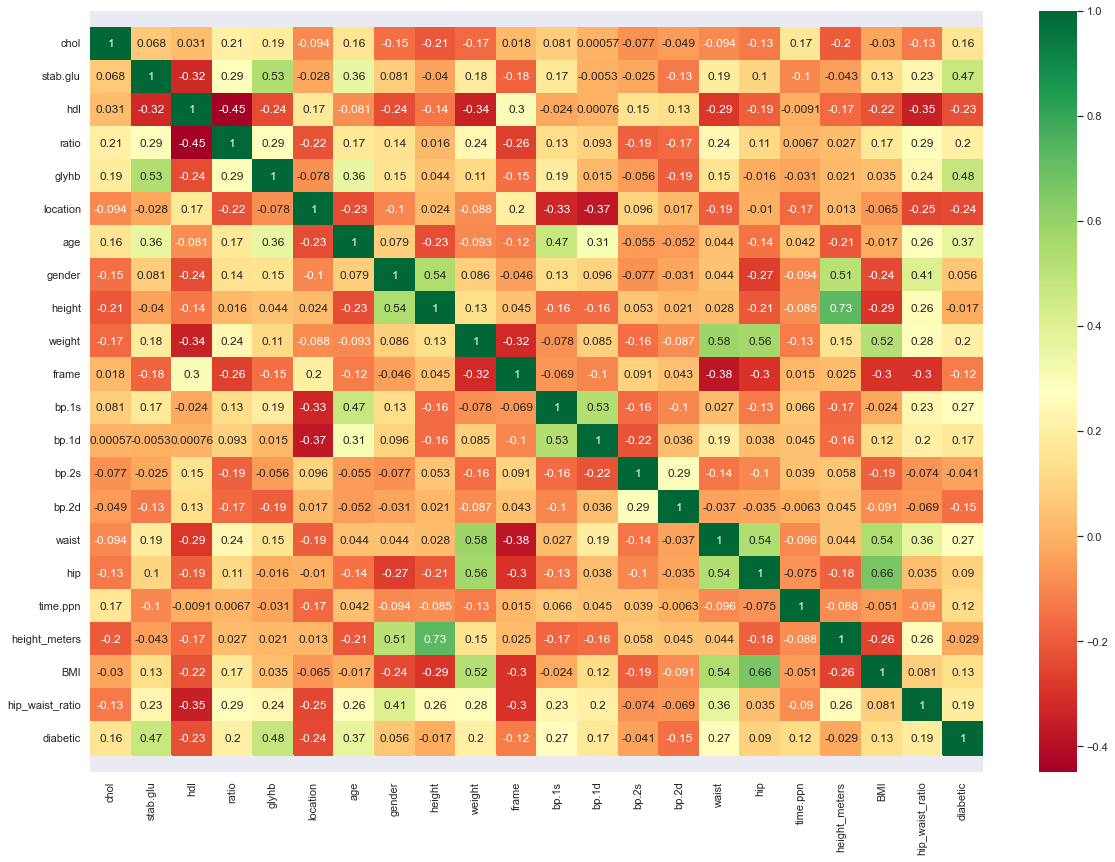

In [27]:
corrmat = df_3.corr()
top_corr_features = corrmat.index

f, ax = plt.subplots(figsize=(20, 14))

g = sns.heatmap(df_3[top_corr_features].corr(), annot=True, cmap='RdYlGn')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

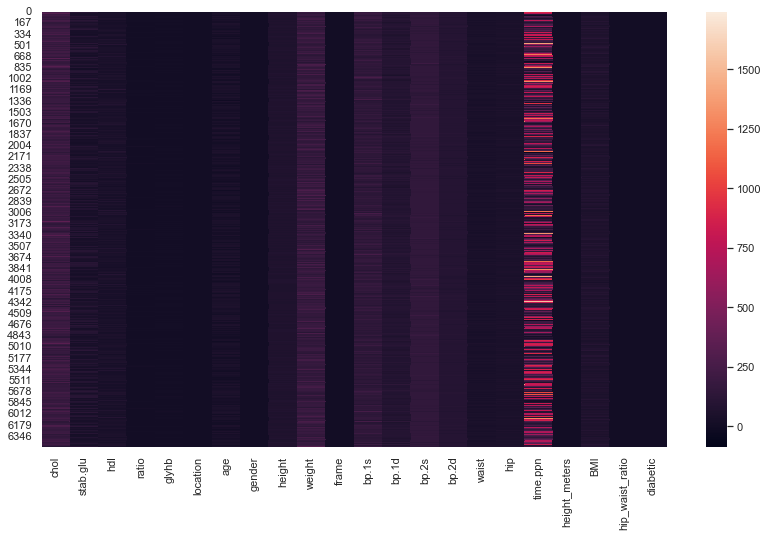

In [26]:
sns.set()
ax = sns.heatmap(df_3)

In [28]:
df_3.columns

Index(['chol', 'stab.glu', 'hdl', 'ratio', 'glyhb', 'location', 'age',
       'gender', 'height', 'weight', 'frame', 'bp.1s', 'bp.1d', 'bp.2s',
       'bp.2d', 'waist', 'hip', 'time.ppn', 'height_meters', 'BMI',
       'hip_waist_ratio', 'diabetic'],
      dtype='object')

In [30]:
fig = px.histogram(df_3, x = 'BMI', marginal='box', color_discrete_sequence=['red'], title='synthetic BMI Distribution')
fig.update_layout(bargap=0.1)
fig.show()

In [32]:
fig = px.histogram(df_2, x ='BMI', marginal='box', color_discrete_sequence=['blue'], title='Original BMI Distribution')
fig.update_layout(bargap=0.1)
fig.show()


In [33]:
fig = px.histogram(df_3, x = 'glyhb', marginal='box', color_discrete_sequence=['red'], title='Synthetic Glycosated Hemoglobin Distribution')
fig.update_layout(bargap=0.1)
fig.show()

In [34]:
fig = px.histogram(df_2, x = 'glyhb', marginal='box', color_discrete_sequence=['green'], title='Original Glycosated Hemoglobin Distribution')
fig.update_layout(bargap=0.1)
fig.show()